In [48]:
import urllib.request
import json
import pandas as pd
from datetime import datetime

#https://www.trilhaseaventuras.com.br/siglas-dos-principais-aeroportos-do-mundo-iata/

#urlOneWay
#https://www.decolar.com/shop/flights-busquets/api/v1/web/search?adults=1&children=0&infants=0&limit=4&site=BR&channel=site&from=POA&to=MIA&departureDate=2020-03-04&groupBy=default&orderBy=total_price_ascending&viewMode=CLUSTER&language=pt_BR&airlineSummary=false&chargesDespegar=false&user=e1861e3a-3357-4a76-861e-3a3357ea76c0&h=38dc1f66dbf4f5c8df105321c3286b5c&flow=SEARCH&di=1-0&clientType=WEB&disambiguationApplied=true&newDisambiguationService=true&initialOrigins=POA&initialDestinations=MIA&pageViewId=62ef8aab-ab53-406c-8429-885702acecbd

In [49]:
dataInicial = '2020-07-05'
dataFinal = '2020-07-20'

idaEvolta=True
#tripType=''

#dataInicial = '2020-04-08'
#dataFinal = '2020-04-22'

#if idaEvolta:
#    tripType = 'roundtrip'
#else:
#    tripType = 'oneway'

specificDate = False

In [50]:
origens = ['POA','GRU','GIG']
destinos = ['ATL','MIA']

#dfDict.append({'de':origem,'para':destino,'Ida': p['departureDate'],'Volta':arr['arrivalDate'],'preco':arr['price']["amount"]})

In [51]:
resumo = []
dfDict =[]

for origem in origens:
    for destino in destinos:  
        minValue = 999999999
        fraseFinal= ''
        print(origem + ' -> '+ destino)
        urlDecolar = '''https://www.decolar.com/shop/flights-busquets/api/v1/web/calendar-prices/matrix?adults=1&children=0&infants=0&limit=4&site=BR&channel=site&from={origem}&to={destino}&departureDate={dataInicial}&returnDate={dataFinal}&orderBy=total_price_ascending&viewMode=CLUSTER&language=pt_BR&clientType=WEB&initialOrigins={origem}&initialDestinations={destino}&pageViewId=b35e67df-abc9-4308-875f-c3810b3729e4&mustIncludeDates=NA_NA&currency=BRL&breakdownType=TOTAL_FARE_ONLY'''.format(dataInicial=dataInicial,dataFinal=dataFinal,origem=origem,destino=destino)
        #print(urlDecolar)
        with urllib.request.urlopen(urlDecolar) as url:
            s = url.read()
            data = json.loads(s.decode('utf-8'))
            #print(data)
            for p in data['departures']:
                for arr in p['arrivals']:
                    if 'price' in arr:
                        dfDict.append({'DataPesquisa':datetime.now().strftime("%d/%m/%Y %H:%M:%S"),'de':origem,'para':destino,'Ida': p['departureDate'],'Volta':arr['arrivalDate'],'preco':arr['price']["amount"]})
                        if specificDate:
                            if p['departureDate'] == dataInicial and arr['arrivalDate'] == dataFinal:                                                                
                                    if minValue > arr['price']["amount"]:
                                        minValue = arr['price']["amount"]
                                        fraseFinal = 'Voo mais barato '+origem + ' -> '+ destino+' de:' + p['departureDate'], ' ate ',arr['arrivalDate'],'- valor: ' + str(arr['price']["amount"])                                
                                        resumo.append(fraseFinal)
                                    print('de:' + p['departureDate'], ' ate ',arr['arrivalDate'],'- valor: ' + str(arr['price']["amount"]))                        
                        else:                        
                                if minValue > arr['price']["amount"]:
                                    minValue = arr['price']["amount"]
                                    fraseFinal = 'Voo mais barato '+origem + ' -> '+ destino+' de:' + p['departureDate'], ' ate ',arr['arrivalDate'],'- valor: ' + str(arr['price']["amount"])                                
                                    resumo.append(fraseFinal)
                                print('de:' + p['departureDate'], ' ate ',arr['arrivalDate'],'- valor: ' + str(arr['price']["amount"]))                        
            print('')
            print(fraseFinal)
            print(minValue)
            print('')
                        
for r in resumo:
    print(r)
                    

POA -> ATL
de:2020-07-05  ate  2020-07-20 - valor: 6175

('Voo mais barato POA -> ATL de:2020-07-05', ' ate ', '2020-07-20', '- valor: 6175')
6175

POA -> MIA
de:2020-07-02  ate  2020-07-17 - valor: 3632
de:2020-07-02  ate  2020-07-18 - valor: 3691
de:2020-07-02  ate  2020-07-19 - valor: 3873
de:2020-07-02  ate  2020-07-20 - valor: 3670
de:2020-07-02  ate  2020-07-21 - valor: 3555
de:2020-07-02  ate  2020-07-22 - valor: 3612
de:2020-07-02  ate  2020-07-23 - valor: 3612
de:2020-07-03  ate  2020-07-17 - valor: 3700
de:2020-07-03  ate  2020-07-18 - valor: 3762
de:2020-07-03  ate  2020-07-19 - valor: 3803
de:2020-07-03  ate  2020-07-20 - valor: 3757
de:2020-07-03  ate  2020-07-21 - valor: 3706
de:2020-07-03  ate  2020-07-22 - valor: 3732
de:2020-07-03  ate  2020-07-23 - valor: 3757
de:2020-07-04  ate  2020-07-17 - valor: 3790
de:2020-07-04  ate  2020-07-18 - valor: 4025
de:2020-07-04  ate  2020-07-19 - valor: 3880
de:2020-07-04  ate  2020-07-20 - valor: 3786
de:2020-07-04  ate  2020-07-21 

In [52]:
df = pd.DataFrame.from_dict(dfDict)

if specificDate:
    df = df[df['Ida']==dataInicial]
    df = df[df['Volta']==dataFinal]
display(df.describe())
display(df.sort_values(by='preco',ascending=True))

,preco
count,151.000000
mean,3568.821192
std,421.532997
min,3137.000000
25%,3354.000000
50%,3443.000000
75%,3703.000000
max,6177.000000


,DataPesquisa,Ida,Volta,de,para,preco
91,17/01/2020 16:54:22,2020-07-07,2020-07-22,GRU,MIA,3137
84,17/01/2020 16:54:22,2020-07-06,2020-07-22,GRU,MIA,3177
98,17/01/2020 16:54:22,2020-07-08,2020-07-22,GRU,MIA,3199
97,17/01/2020 16:54:22,2020-07-08,2020-07-21,GRU,MIA,3212
83,17/01/2020 16:54:22,2020-07-06,2020-07-21,GRU,MIA,3226
109,17/01/2020 16:54:23,2020-07-03,2020-07-17,GIG,MIA,3237
56,17/01/2020 16:54:22,2020-07-02,2020-07-22,GRU,MIA,3238
92,17/01/2020 16:54:22,2020-07-07,2020-07-23,GRU,MIA,3246
85,17/01/2020 16:54:22,2020-07-06,2020-07-23,GRU,MIA,3254
57,17/01/2020 16:54:22,2020-07-02,2020-07-23,GRU,MIA,3263


In [53]:
with open('historicoPesquisaPrecos.csv', 'a') as f:
    df.to_csv(f, mode='a',header=f.tell()==0)

In [54]:
dfGrafico = pd.read_csv("historicoPesquisaPrecos.csv") 
dfGrafico['DataPesquisa'] = dfGrafico['DataPesquisa'].apply(lambda x:x[0:13])
dfGrafico['DataPesquisaDATA']=dfGrafico['DataPesquisa'].apply(lambda x:pd.to_datetime(x[0:10]))
dfGrafico['Dias'] = dfGrafico.apply(lambda x: int(str(pd.to_datetime(x['Volta'])- pd.to_datetime(x['Ida']))[0:2]),axis=1)

In [55]:
dfGrafico['OrigemDestino'] = dfGrafico.apply(lambda x: x['de'] + x['para'],axis=1)
dfGrafico['EspecificoIda'] = dfGrafico.apply(lambda x: x['de'] + x['para']+'-'+x['Ida'],axis=1)
dfGrafico['EspecificoVolta'] = dfGrafico.apply(lambda x: x['de'] + x['para']+'-'+x['Volta'],axis=1)
dfGrafico['EspecificoTodos'] = dfGrafico.apply(lambda x: x['de'] + x['para']+'-'+x['Ida']+'-'+x['Volta'],axis=1)
display(dfGrafico)

,Unnamed: 0,DataPesquisa,Ida,Volta,de,para,preco,DataPesquisaDATA,Dias,OrigemDestino,EspecificoIda,EspecificoVolta,EspecificoTodos
0,0,16/01/2020 15,2020-07-05,2020-07-20,POA,ATL,6561,2020-01-16,15,POAATL,POAATL-2020-07-05,POAATL-2020-07-20,POAATL-2020-07-05-2020-07-20
1,1,16/01/2020 15,2020-07-02,2020-07-17,POA,MIA,3834,2020-01-16,15,POAMIA,POAMIA-2020-07-02,POAMIA-2020-07-17,POAMIA-2020-07-02-2020-07-17
2,2,16/01/2020 15,2020-07-02,2020-07-18,POA,MIA,3864,2020-01-16,16,POAMIA,POAMIA-2020-07-02,POAMIA-2020-07-18,POAMIA-2020-07-02-2020-07-18
3,3,16/01/2020 15,2020-07-02,2020-07-19,POA,MIA,4003,2020-01-16,17,POAMIA,POAMIA-2020-07-02,POAMIA-2020-07-19,POAMIA-2020-07-02-2020-07-19
4,4,16/01/2020 15,2020-07-02,2020-07-20,POA,MIA,3892,2020-01-16,18,POAMIA,POAMIA-2020-07-02,POAMIA-2020-07-20,POAMIA-2020-07-02-2020-07-20
5,5,16/01/2020 15,2020-07-02,2020-07-21,POA,MIA,3922,2020-01-16,19,POAMIA,POAMIA-2020-07-02,POAMIA-2020-07-21,POAMIA-2020-07-02-2020-07-21
6,6,16/01/2020 15,2020-07-02,2020-07-22,POA,MIA,3919,2020-01-16,20,POAMIA,POAMIA-2020-07-02,POAMIA-2020-07-22,POAMIA-2020-07-02-2020-07-22
7,7,16/01/2020 15,2020-07-02,2020-07-23,POA,MIA,3928,2020-01-16,21,POAMIA,POAMIA-2020-07-02,POAMIA-2020-07-23,POAMIA-2020-07-02-2020-07-23
8,8,16/01/2020 15,2020-07-03,2020-07-17,POA,MIA,3766,2020-01-16,14,POAMIA,POAMIA-2020-07-03,POAMIA-2020-07-17,POAMIA-2020-07-03-2020-07-17
9,9,16/01/2020 15,2020-07-03,2020-07-18,POA,MIA,3781,2020-01-16,15,POAMIA,POAMIA-2020-07-03,POAMIA-2020-07-18,POAMIA-2020-07-03-2020-07-18


In [56]:
dfGraficoPOA_ATL = dfGrafico.query('de == "POA" & para == "ATL"')
dfGraficoPOA_MIA = dfGrafico.query('de == "POA" & para == "MIA"')
dfGraficoGRU_MIA = dfGrafico.query('de == "GRU" & para == "MIA"')
dfGraficoGRU_ATL = dfGrafico.query('de == "GRU" & para == "ATL"')

datasets = [dfGrafico,dfGraficoPOA_ATL,dfGraficoPOA_MIA,dfGraficoGRU_MIA,dfGraficoGRU_ATL]

print(dfGraficoPOA_ATL['Ida'].count())
print(dfGraficoPOA_MIA['Ida'].count())
print(dfGraficoGRU_MIA['Ida'].count())
print(dfGraficoGRU_ATL['Ida'].count())

9
441
441
22


In [57]:
import plotly.express as px

for graph in datasets: 
    #graph = graph.query('Ida =="2020-07-05" & Volta =="2020-07-20"')
    graph = graph.query('de =="POA" & Dias >=14 & Dias <=17')# | de =="GRU"')
    fig = px.line(graph.drop_duplicates(), x="DataPesquisa", y="preco", color="EspecificoTodos",hover_data=['de','para','Ida', 'Volta','preco'])
    fig.show()

In [58]:
import pandas_profiling
print(dfGraficoPOA_MIA.columns)

Index(['Unnamed: 0', 'DataPesquisa', 'Ida', 'Volta', 'de', 'para', 'preco',
       'DataPesquisaDATA', 'Dias', 'OrigemDestino', 'EspecificoIda',
       'EspecificoVolta', 'EspecificoTodos'],
      dtype='object')


,Ida,Volta,de,para,preco,DataPesquisaDATA,Dias
1,2020-07-02,2020-07-17,POA,MIA,3834,2020-01-16,15
2,2020-07-02,2020-07-18,POA,MIA,3864,2020-01-16,16
3,2020-07-02,2020-07-19,POA,MIA,4003,2020-01-16,17


MemoryError: 

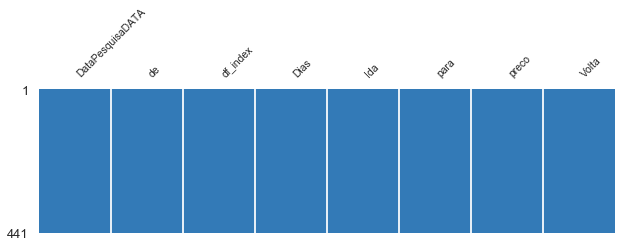

In [59]:
pandasDf=dfGraficoPOA_MIA[['Ida', 'Volta', 'de', 'para', 'preco','DataPesquisaDATA', 'Dias']]
display(pandasDf.head(3))
pandas_profiling.ProfileReport(pandasDf)


In [ ]:
#POSTMAN ONE WAY 

In [ ]:
import requests

dataInicial = '2020-04-08'
dataFinal = '2020-04-22'

origens = ['POA','GRU','GIG','BSB','FOR']
destinos = ['ATL','MIA']

url = "https://www.decolar.com/shop/flights-busquets/api/v1/web/search"

for origem in origens:
    for destino in destinos:        
        querystring = {"adults":"1","limit":"4","site":"BR","channel":"site","from":"{origem}".format(origem=origem),"to":"{destino}".format(destino=destino),"departureDate":"2020-03-04","orderBy":"total_price_ascending","viewMode":"CLUSTER","language":"pt_BR","h":"38dc1f66dbf4f5c8df105321c3286b5c","flow":"SEARCH","clientType":"WEB","initialOrigins":"{origem}".format(origem=origem),"initialDestinations":"{destino}".format(destino=destino)}
    
        headers = {
            'Connection': "keep-alive",
            'DNT': "1",
            'X-UOW': "results-13-1579106681089",
            'X-RequestId': "xzTTJ6fDfw",
            'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36",
            'Accept': "application/json, text/javascript, */*; q=0.01",
            'X-Requested-With': "XMLHttpRequest",
            'XDESP-REFERRER': "https://www.decolar.com/shop/flights/search/oneway/{origem}/{destino}/2020-03-04/2/0/0/NA/NA/NA/NA/?from=SB&di=2-0".format(origem=origem,destino=destino),
            'Sec-Fetch-Site': "same-origin",
            'Sec-Fetch-Mode': "cors",
            'Referer': "https://www.decolar.com/shop/flights/search/oneway/{origem}/{destino}/2020-03-04/1/0/0/NA/NA/NA/NA/?from=SB&di=1-0".format(origem=origem,destino=destino),
            'Accept-Encoding': "gzip, deflate, br",
            'Accept-Language': "pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7",
            'Cookie': 'trackerid=e1861e3a-3357-4a76-861e-3a3357ea76c0; xdesp-rand-usr=292; xdsid=C632CEAAF251AE2A72F165ECA9A4A2CA; xduid=1727A02D2FAA249C654A094113369154; _ga=GA1.2.772144563.1579011917; _gid=GA1.2.317154519.1579011917; trackeame_cookie=%7B%22id%22%3A%22UPA_e1861e3a-3357-4a76-861e-3a3357ea76c0%22%2C%22version%22%3A%225.0%22%2C%22upa_id%22%3A%22e1861e3a-3357-4a76-861e-3a3357ea76c0%22%2C%22creation_date%22%3A%222020-01-14T14%3A25%3A17Z%22%7D; __ssid=41de76d348be0e334af8e657f6801b8; _gcl_au=1.1.1367791908.1579011932; _fbp=fb.1.1579011933564.1470255143; __gads=ID=9139db3a836078f5:T=1579011933:S=ALNI_MawboBo55i9nPvoDvzaF396HudEKg; abzTestingId="{\"flightsFisherAB\":90,\"pkgImbatibleBrand_ctrl\":76,\"s_flights_s_violet_sbox_v1\":21,\"upsellingConfig\":58,\"twoOneWayForceMX\":0,\"filterLandingFlights\":41,\"s_loyalty_v2_ctrl\":5,\"s_flights_l_violet_sbox_v1\":0,\"s_flights_l_loyalty_v2\":58,\"mostProfitablePromotion\":0,\"despechecks\":72,\"s_loyalty_v2_review\":33,\"platform\":55,\"selected_radio_button\":0,\"fisher_2ow\":0,\"loyalty_non_adherents\":63,\"paymentMethod\":55,\"shifuMobileProductLabels\":0,\"obFee\":40,\"twoOneWay\":0,\"s_violet_sbox_v1\":17,\"s_flights_s_loyalty_v2\":14,\"flights_loyalty_non_adherents\":63,\"pkgImbatibleBrand-ctrl\":60,\"crossBorderTicketing\":0}; chktkn=ask3r5kj6ed0ksqrs7eio4cebk; searchId=243920d8-49cc-4271-972a-60d05221ef20; _gat_UA-36944350-2=1,trackerid=e1861e3a-3357-4a76-861e-3a3357ea76c0; xdesp-rand-usr=292; xdsid=C632CEAAF251AE2A72F165ECA9A4A2CA; xduid=1727A02D2FAA249C654A094113369154; _ga=GA1.2.772144563.1579011917; _gid=GA1.2.317154519.1579011917; trackeame_cookie=%7B%22id%22%3A%22UPA_e1861e3a-3357-4a76-861e-3a3357ea76c0%22%2C%22version%22%3A%225.0%22%2C%22upa_id%22%3A%22e1861e3a-3357-4a76-861e-3a3357ea76c0%22%2C%22creation_date%22%3A%222020-01-14T14%3A25%3A17Z%22%7D; __ssid=41de76d348be0e334af8e657f6801b8; _gcl_au=1.1.1367791908.1579011932; _fbp=fb.1.1579011933564.1470255143; __gads=ID=9139db3a836078f5:T=1579011933:S=ALNI_MawboBo55i9nPvoDvzaF396HudEKg; abzTestingId="{\"flightsFisherAB\":90,\"pkgImbatibleBrand_ctrl\":76,\"s_flights_s_violet_sbox_v1\":21,\"upsellingConfig\":58,\"twoOneWayForceMX\":0,\"filterLandingFlights\":41,\"s_loyalty_v2_ctrl\":5,\"s_flights_l_violet_sbox_v1\":0,\"s_flights_l_loyalty_v2\":58,\"mostProfitablePromotion\":0,\"despechecks\":72,\"s_loyalty_v2_review\":33,\"platform\":55,\"selected_radio_button\":0,\"fisher_2ow\":0,\"loyalty_non_adherents\":63,\"paymentMethod\":55,\"shifuMobileProductLabels\":0,\"obFee\":40,\"twoOneWay\":0,\"s_violet_sbox_v1\":17,\"s_flights_s_loyalty_v2\":14,\"flights_loyalty_non_adherents\":63,\"pkgImbatibleBrand-ctrl\":60,\"crossBorderTicketing\":0}"; chktkn=ask3r5kj6ed0ksqrs7eio4cebk; searchId=243920d8-49cc-4271-972a-60d05221ef20; _gat_UA-36944350-2=1; xdsid=DCF9EDC0035E07BEDBFEE30E55F725C5; xduid=55D857BEFC5E27A8B84A7407D4A86B38; xdesp-rand-usr=292; abzTestingId="{\"flightsFisherAB\":90,\"pkgImbatibleBrand_ctrl\":76,\"s_flights_s_violet_sbox_v1\":21,\"upsellingConfig\":58,\"twoOneWayForceMX\":0,\"filterLandingFlights\":41,\"s_loyalty_v2_ctrl\":5,\"s_flights_l_violet_sbox_v1\":0,\"s_flights_l_loyalty_v2\":58,\"mostProfitablePromotion\":0,\"despechecks\":72,\"s_loyalty_v2_review\":33,\"platform\":55,\"selected_radio_button\":0,\"fisher_2ow\":0,\"loyalty_non_adherents\":63,\"paymentMethod\":55,\"shifuMobileProductLabels\":0,\"obFee\":40,\"twoOneWay\":0,\"s_violet_sbox_v1\":17,\"s_flights_s_loyalty_v2\":14,\"flights_loyalty_non_adherents\":63,\"pkgImbatibleBrand-ctrl\":60,\"crossBorderTicketing\":0}',
            'Cache-Control': "no-cache",
            'Postman-Token': "4c6c6b9f-ed0a-477f-a787-c8cde039475b,4e35a9da-93ed-4602-825a-283f619d543b",
            'Host': "www.decolar.com",
            'cache-control': "no-cache"
            }

        response = requests.request("GET", url, headers=headers, params=querystring)
        dataOneWay = json.loads(response.text)
        print(origem, '->' , destino)
        print(querystring)
        print(dataOneWay)
        if 'clusters' in dataOneWay:
            for i in dataOneWay['clusters']:                
                print(i['priceDetail']['mainFare']['amount'])


